In [1]:
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
# df = pd.read_csv("D:\Python\ML\Datasets\international-airline-passengers.csv",parse_dates = ['Month'],index_col= 'Month')
df = pd.read_csv("D:\Python\ML\Datasets\international-airline-passengers.csv",header = 0,index_col= 0)

df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


In [3]:
df.rename(columns = {'International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60':'Totals'},inplace = True)
df.head()

,Totals
Month,
1949-01,112.0
1949-02,118.0
1949-03,132.0
1949-04,129.0
1949-05,121.0


Totals    1
dtype: int64


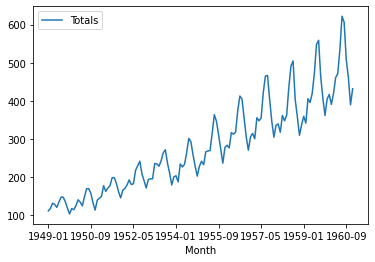

In [9]:
df.plot()
print(df.isna().sum())
df = df.dropna()

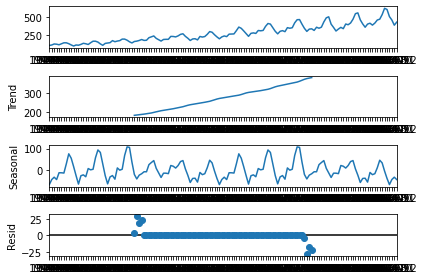

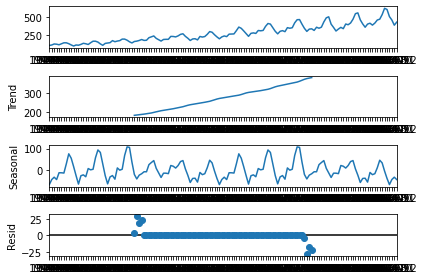

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal =seasonal_decompose(df,model = 'additive',period=int(len(df)/2)-2)
seasonal.plot()
# plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df.Totals.dropna())

print(f'ADF Statestic {result[0]}')
print(f'P-Value {result[1]}')
print(f'The number of lags used {result[2]}')
print(f'The number of observations used for the ADF regression and calculation of the critical values. {result[3]}')
print(f'Critical values for the test statistic at the 1 %, 5 %, and 10 % levels {result[4]}')


ADF Statestic 0.8153688792060518
P-Value 0.991880243437641
The number of lags used 13
The number of observations used for the ADF regression and calculation of the critical values. 130
Critical values for the test statistic at the 1 %, 5 %, and 10 % levels {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}


In [17]:
# df.Totals.isna().sum()
def check(x):
    if x < 0.05:
        return 'Series is Stationary',x
    else:
        return 'Series is Non-Stationary'  ,x      

In [18]:
check(result[1])

('Series is Non-Stationary', 0.991880243437641)

In [19]:
# Differencing one
df1 = df.diff()
result = adfuller(df1.dropna())
check(result[1])

('Series is Non-Stationary', 0.05421329028382446)

In [20]:
# Differencing 2
df2 = df1.diff()
result = adfuller(df2.dropna())
check(result[1])

('Series is Stationary', 2.732891850013967e-29)

<AxesSubplot:xlabel='Month'>

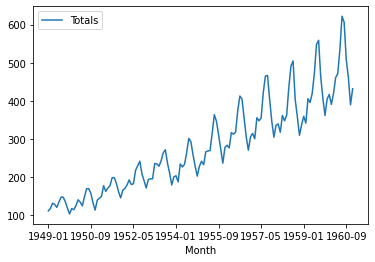

In [21]:
df.plot()

<AxesSubplot:xlabel='Month'>

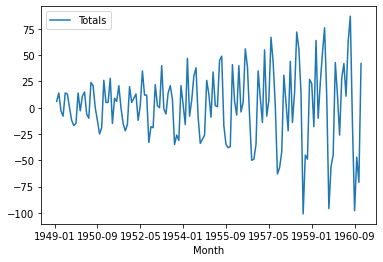

In [22]:
df1.plot()

<AxesSubplot:xlabel='Month'>

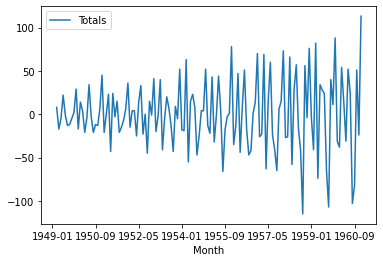

In [23]:
df2.plot()

In [24]:
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [25]:
# help(pacf)
print(pacf(df2.dropna()))

[ 1.         -0.19236052 -0.24484385 -0.1593931  -0.35518278 -0.11179578
 -0.16932872  0.07809127 -0.32871598 -0.07472605 -0.59604253 -0.8972369
 -0.66735853 -1.67894988  2.92389206  0.75817234  0.48215253  0.57631809
  0.5313731   0.8504482   3.77006309 -1.30773798 -0.58639747 -0.41945858
 -0.37557997 -0.49974588 -1.09237574  8.42489277  0.93534501  0.46188825
  0.22929593  0.16686614  0.79341398  1.87417571 -2.01093182 -0.88751708
 -1.18584885  1.11145641 11.1589822  -1.027871   -1.71194099]


C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


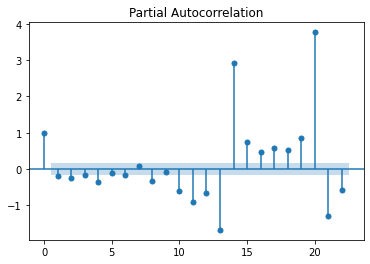

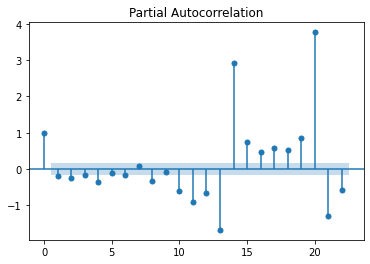

In [26]:
plot_pacf(df2.dropna())

In [27]:
# lag order = 4
from statsmodels.tsa.ar_model import AR
model = AR(df2.dropna())
model_fitted = model.fit()
print('Lag Order Choosen',model_fitted.k_ar)
print('The coefficients of the model are:\n %s' % model_fitted.params)

Lag Order Choosen 13
The coefficients of the model are:
 const         0.313498
L1.Totals    -1.342644
L2.Totals    -1.425071
L3.Totals    -1.387251
L4.Totals    -1.452888
L5.Totals    -1.391014
L6.Totals    -1.451045
L7.Totals    -1.423174
L8.Totals    -1.554630
L9.Totals    -1.471749
L10.Totals   -1.550446
L11.Totals   -1.454301
L12.Totals   -0.500157
L13.Totals   -0.003578
dtype: float64


C:\Users\Win\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATI

In [28]:
pred = model_fitted.predict()
pred

1950-04-01    -18.689601
1950-05-01      1.866398
1950-06-01     24.500409
1950-07-01    -10.211669
1950-08-01    -26.054406
                 ...    
1960-08-01    -86.185970
1960-09-01    -69.241495
1960-10-01     26.944092
1960-11-01     -4.145825
1960-12-01    117.247834
Freq: MS, Length: 129, dtype: float64

<AxesSubplot:xlabel='Month'>

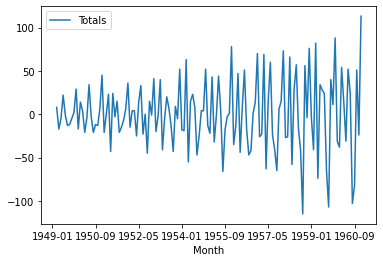

In [29]:
df2.plot()
# pred.plot()
# plt.plot(pred)

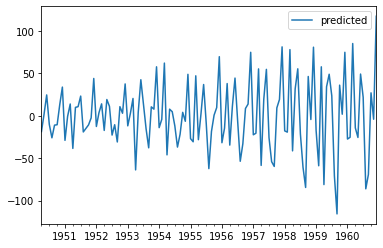

In [30]:
pred.plot(label = 'predicted')
plt.legend()